In [ ]:
!apt update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main Sources [1,830 kB]
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
H

In [ ]:
!apt install -y cmake


Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
0 upgraded, 0 newly installed, 0 to remove and 82 not upgraded.


In [ ]:
!pip install dlib

In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 22 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=db7f77cb2fe9f0e5c37f19a6ca57e1367123250e4dd41bda1e38d0dd6716800a
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


# Importing

In [ ]:
!nvidia-smi

Wed Mar  9 12:49:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import cv2
import numpy as np
import face_recognition

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ImagesBasic

In [ ]:
!mkdir ImagesAttendance

In [ ]:
!cp /content/drive/MyDrive/datasets/fd/bibhu1.jpg /content/ImagesBasic/bibhu.jpg
!cp /content/drive/MyDrive/datasets/fd/bibhu.jpg /content/ImagesBasic/bibhuTest.jpg
!cp /content/drive/MyDrive/datasets/fd/Adarsh.jpg /content/ImagesBasic/adarsh.jpg

cp: cannot stat '/content/drive/MyDrive/datasets/fd/adarsh.jpg': No such file or directory


In [ ]:
# Loading Image
person = face_recognition.load_image_file('/content/ImagesBasic/bibhu.jpg')
# Since this library prefers RGB images, converting it into RGB (BGR2RGB)
person = cv2.cvtColor(person,cv2.COLOR_BGR2RGB)


In [ ]:
person_test = face_recognition.load_image_file('/content/photo.jpg')
person_test = cv2.cvtColor(person_test,cv2.COLOR_BGR2RGB)

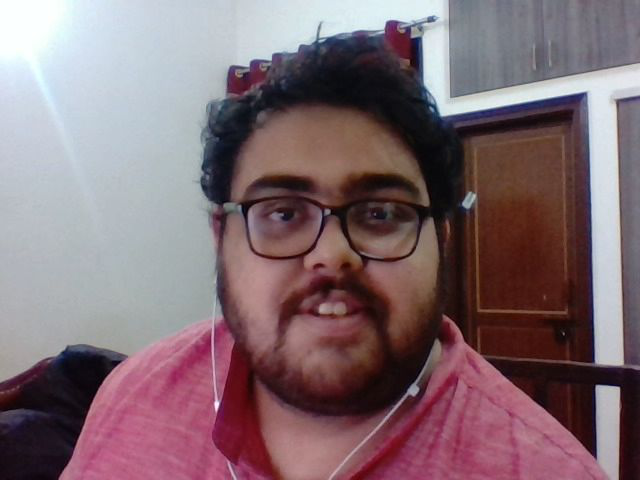

In [ ]:
cv2_imshow(person_test)

In [ ]:
face_location = face_recognition.face_locations(person_test)

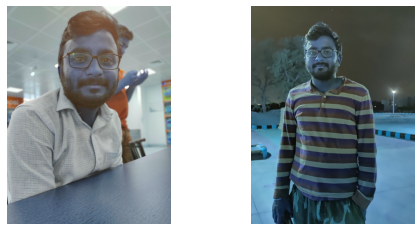

In [ ]:
plt.figure(figsize = (8,4))
# cv2.imshow('Person',person)
# cv2.imshow('Person Test',person_test)
# cv2.waitKey(0)
# cv2_imshow(person)
# cv2_imshow(person_test)
# cv2.waitKey(0)
plt.subplot(121); plt.imshow(person); plt.axis('off');
plt.subplot(122); plt.imshow(person_test); plt.axis('off');


In [ ]:
# checking the location of face in image
face_location = face_recognition.face_locations(person)[0] #bounding box  location
encodePerson = face_recognition.face_encodings(person)[0]


In [ ]:
face_location #y1,x2,y2,x1 top right bottom left

(142, 414, 365, 191)

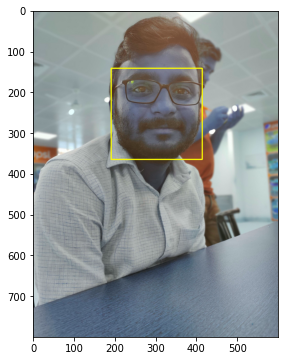

In [ ]:
plt.figure(figsize = (12,6))
cv2.rectangle(person,(face_location[3],face_location[0]),(face_location[1],face_location[2]),(255,255,0),2)
plt.imshow(person)
# cv2_imshow(person)

In [ ]:
# checking the location of face in image
face_locationTest = face_recognition.face_locations(person_test)[0] #bounding box  location
encodePersonTest = face_recognition.face_encodings(person_test)[0]
plt.figure(figsize = (12,6))
cv2.rectangle(person_test,(face_locationTest[3],face_locationTest[0]),(face_locationTest[1],face_locationTest[2]),(255,255,0),2)
cv2.putText(person_test,f'{results}{round(face_distance[0],2)}',(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
plt.imshow(person_test)
# cv2_imshow(person)

In [ ]:
cv2.putText(person_test,f'{results}  {round(face_distance[0],2)}',(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
cv2_imshow(person_test)

In [ ]:
person2 = face_recognition.load_image_file('/content/ImagesBasic/adarsh.jpg')
person2 = cv2.cvtColor(person2,cv2.COLOR_BGR2RGB)
# checking the location of face in image
face_location2 = face_recognition.face_locations(person2)[0] #bounding box  location
encodePerson2 = face_recognition.face_encodings(person2)[0]
plt.figure(figsize = (12,6))
cv2.rectangle(person2,(face_location2[3],face_location2[0]),(face_location2[1],face_location2[2]),(255,255,0),2)
plt.imshow(person2)


In [ ]:
# Let's compare these faces and get the distance between them
results = face_recognition.compare_faces([encodePerson],encodePersonTest) #list of known faces
print(results) #True means same face and false means not the same face

[True]


In [ ]:
# Let's compare these faces and get the distance between them
results = face_recognition.compare_faces([encodePerson2],encodePersonTest) #list of known faces
print(results) #True means same face and false means not the same face

In [ ]:
# Check similarity between faces
face_distance = face_recognition.face_distance([encodePerson],encodePersonTest)
print(face_distance) # lower the value , better the result
face_distance2 = face_recognition.face_distance([encodePerson2],encodePersonTest)
print(face_distance2)

[0.37788236]
[0.66526177]


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


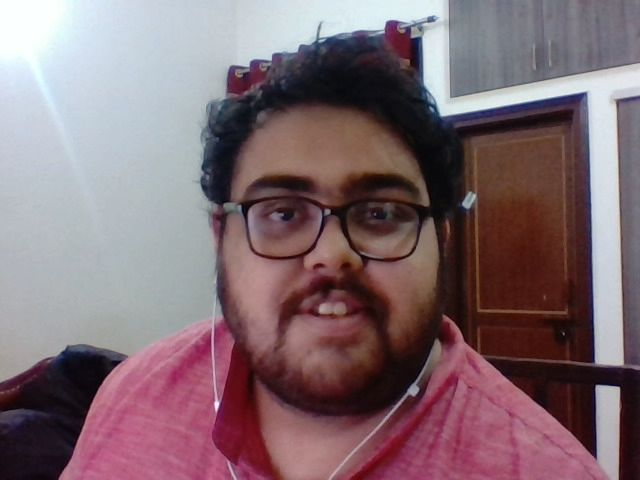

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Take Attendance

In [ ]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime as dt
from dateutil.tz import gettz
from os.path import exists
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [ ]:
# Preparing the Class
path = '/content/drive/MyDrive/datasets/fd/attendance/ImagesAttendance'
images = []
personNames = []
listOfPerson = os.listdir(path)
# print(listOfPerson)
for person in listOfPerson:
    current_image = cv2.imread(f'{path}/{person}')
    images.append(current_image)
    personNames.append(os.path.splitext(person)[0])

In [ ]:
# Function for Encoding the faces of persons
def encodePerson(images):
    encodeList = []
    
    for image in images:       
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(image)[0]
        encodeList.append(encode)
    return encodeList

In [ ]:
!mkdir AttendanceDates

In [ ]:
# Function for Logging Attendance
def attendanceLog(name):
    current_date = dt.now(tz=gettz('Asia/Kolkata')).strftime('%d.%m.%Y')
    path = '/content/AttendanceDates/'
    current_date_csv = path+current_date+'.csv'
    with open(current_date_csv,'a+') as f:
        f.seek(0,0)
        dataList = f.readlines() # each line contains name
        names = []
        for line in dataList:
            entry = line.split(',')
            names.append(entry[0])
        if name not in names:
            now = dt.now(tz=gettz('Asia/Kolkata')) #current time
            format = now.strftime('%H:%M:%S')
            f.writelines(f"{name},{format}\n")


In [ ]:
attendanceLog('Mojo')

In [ ]:
current_date = dt.now(tz=gettz('Asia/Kolkata')).strftime('%d.%m.%Y')
path = '/content/AttendanceDates/'
current_date_csv = path+current_date+'.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(current_date_csv,header=None)
df.head(10)

In [ ]:
# Getting encoding of all the person
encodedPersons = encodePerson(images)

In [ ]:
file_exists = exists('/content/photo.jpg')
file_exists

True

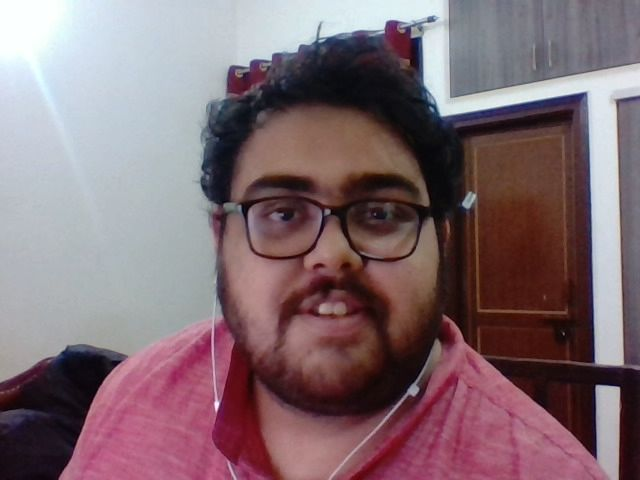

In [ ]:
image = cv2.imread('/content/photo.jpg')
cv2_imshow(image)

In [ ]:
# from face_recognition.api import face_locations
capture = cv2.VideoCapture(0)
while True:
    flag, image = capture.read()
    if flag == False:
        capture.release()
        print(f"no video/feed")
        #checking if photo is available:
        if exists('/content/photo.jpg'):
            image = cv2.imread('/content/photo.jpg')
        else:
            break
    # resize the image 

    resized_image = cv2.resize(image,(0,0),None,0.25,0.25)
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    cv2_imshow(image)
    fl = face_recognition.face_locations(image)
    print(f"total faces {len(fl)}")
    current_frame_faces = face_recognition.face_locations(image)
    # current_frame_faces = face_recognition.face_locations(resized_image)
    current_frame_encoding = face_recognition.face_encodings(resized_image,current_frame_faces)
    print(f"total faces detected = {len(current_frame_faces)}")
    for face_encoding,face_location in zip(current_frame_encoding,current_frame_faces):
        matches = face_recognition.compare_faces(encodedPersons,face_encoding)
        face_distance = face_recognition.face_distance(encodedPersons,face_encoding)
        print(face_distance)
        matchIndex = np.argmin(face_distance)
        print(matchIndex)
        if face_distance[matchIndex] < 0.50 :
            name = personNames[matchIndex].upper()
            attendanceLog(name)
            y1,x2,y2,x1 = face_location
            # y1,x2,y2,x1 = 4*y1, 4*x2, 4*y2, 4*x1
            cv2.rectangle(image,(x1,y1),(x2,y2),(0,0,255),2)
            # cv2.rectangle(image,(x1,y2-30),(x2,y2),(0,0,255),cv2.FILLED)
            cv2.putText(image,name,(x1-10,y2+20),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),1)
            # cv2_imshow(image)
            # cv2.imshow(image)
        else:
            print(f"Spotted person is not in class")
            name = 'Unknown'
            y1,x2,y2,x1 = face_location
            # y1,x2,y2,x1 = 4*y1, 4*x2, 4*y2, 4*x1
            cv2.rectangle(image,(x1,y1),(x2,y2),(0,0,255),2)
            # cv2.rectangle(image,(x1,y1-10),(x2,y2),(0,0,255),cv2.FILLED)
            cv2.putText(image,name,(x1-10,y2+20),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),1)
            # cv2_imshow(image)
            # cv2.imshow(image)
    if flag == False:
        break
    else:
        cv2.waitKey(1)

In [ ]:
personNames

['Rohan',
 'Hemant',
 'Anil Rawat',
 'Surendra',
 'Adarsh',
 'Vivek Anand',
 'shailesh',
 'Varun',
 'bibhu']

In [ ]:
cv2_imshow(image)